#Import Libraries


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#install the pyreadstat module
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.3 MB/s eta 0:00:00


#1. Data Acquisition

In [3]:
df = pd.read_csv('/content/framingham.csv')

##Scanning the dataframe

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.shape

(4240, 16)

In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
# education feature is not required as its not predicting the Ten Year CHD
# target is Ten Year CHD (0 or 1)
df.drop('education', axis=1, inplace=True)

In [11]:
# renaming TenYearCHD to CHD
df.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [12]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.14, random_state=0)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('./heart_study_train.csv')
test_data.to_csv('./heart_study_test.csv')

#EDA

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='CHD', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 54.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


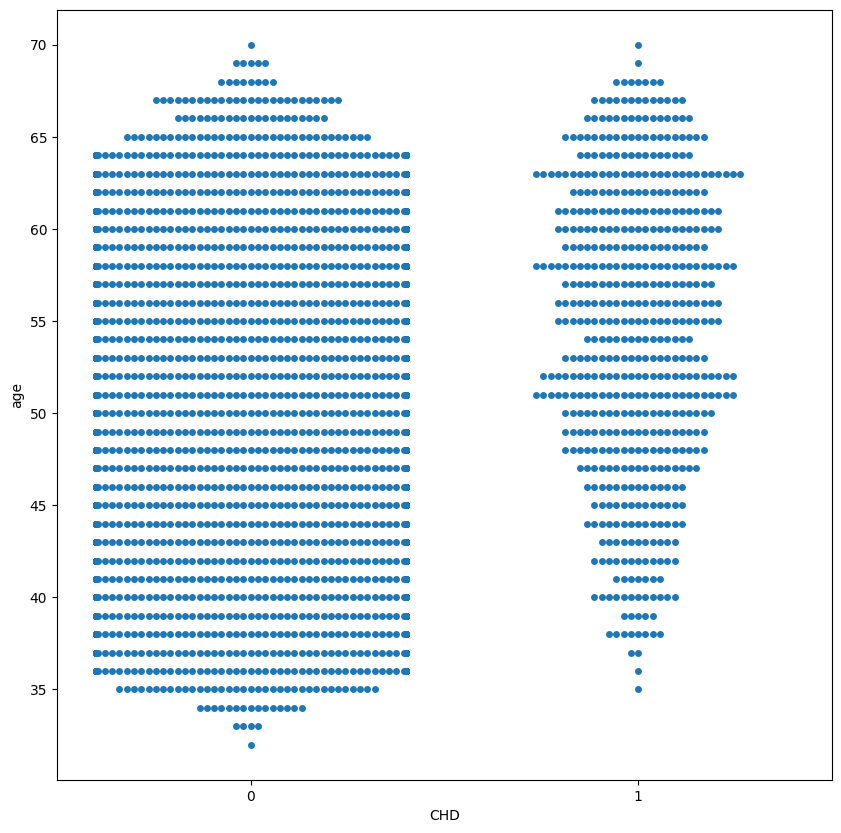

In [15]:
# age vs CHD
plt.figure(figsize=(10,10))
sns.swarmplot(x='CHD', y='age', data=train_data)

<Axes: xlabel='CHD', ylabel='age'>

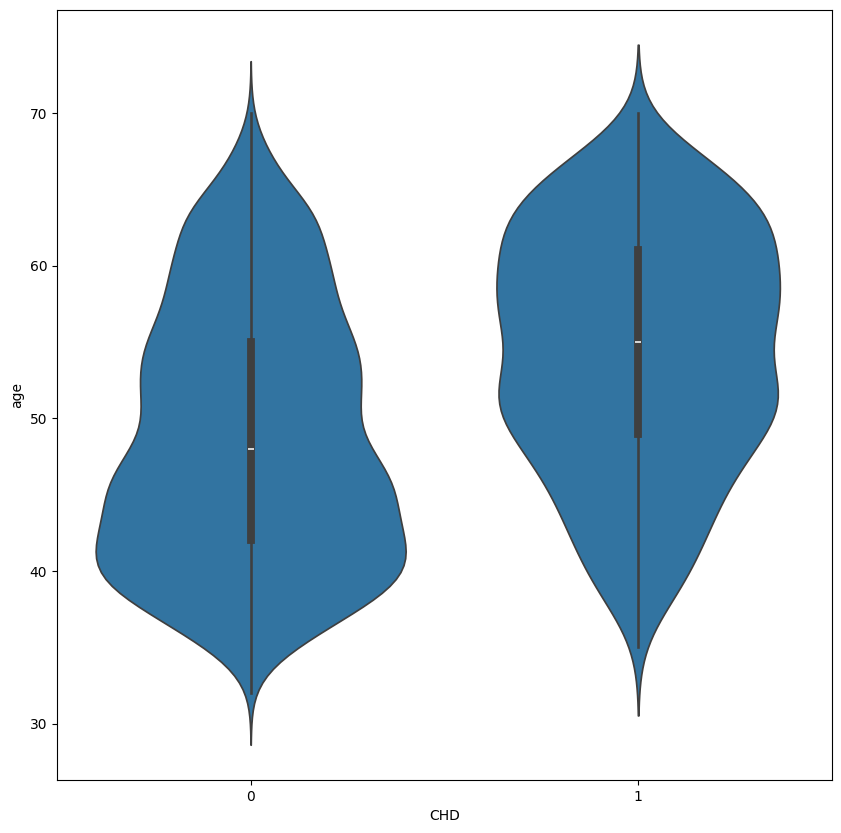

In [16]:
plt.figure(figsize=(10,10))
sns.violinplot(x='CHD', y='age', data=train_data)

Violinplot tells that most patients of age around 40-55 have 0 risk

Most patients of age around 60-65 have risk of disease (CHD)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='CHD', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 54.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


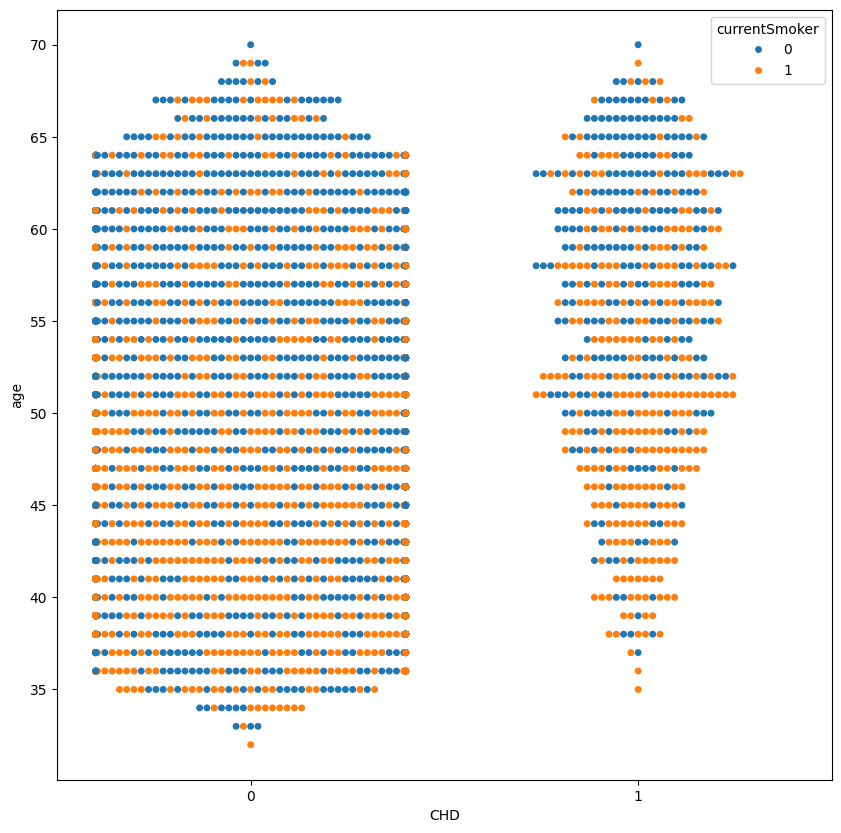

In [17]:
# age vs CHD for smokers or non-smoker
plt.figure(figsize=(10,10))
sns.swarmplot(x='CHD', y='age', data=train_data, hue='currentSmoker')

<Axes: xlabel='CHD', ylabel='age'>

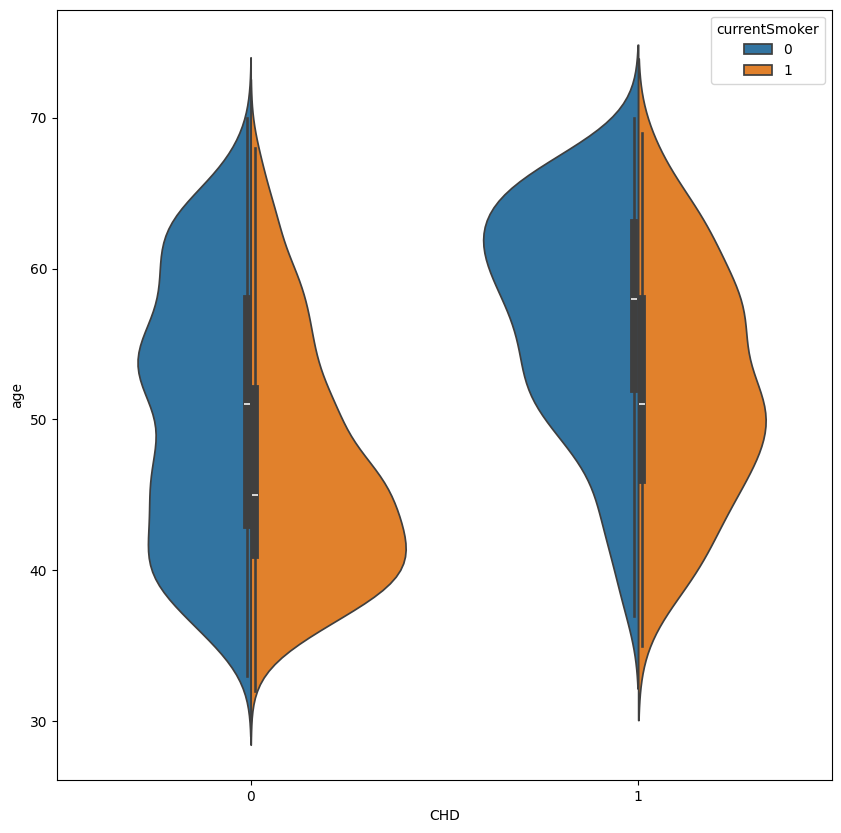

In [18]:
plt.figure(figsize=(10,10))
sns.violinplot(x='CHD', y='age', data=train_data, hue='currentSmoker', split=True)

From this violinplot, we see that most of smokers having no risk of CHD are in age around 40 years

But most of non-smokers having risk are in age around 65-70 years Also most smokers having risk are in age around 50 years

<Axes: xlabel='male', ylabel='count'>

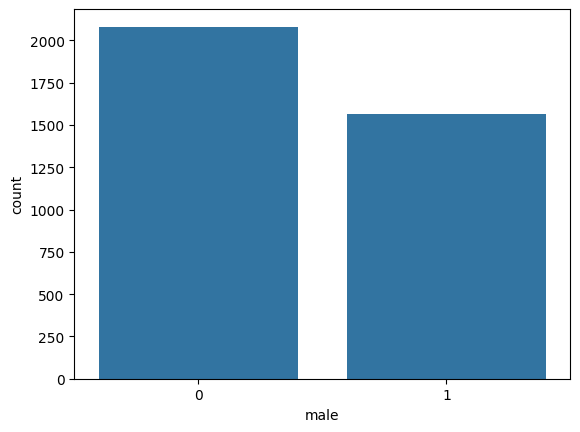

In [19]:
# male and female countplot
sns.countplot(x=train_data['male'])

<Axes: xlabel='male', ylabel='count'>

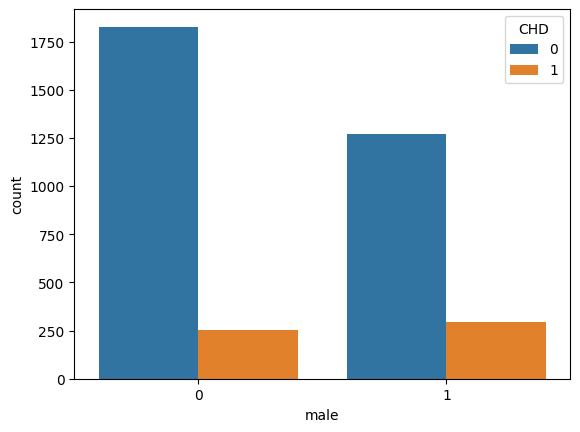

In [20]:
# male and female having disease or not
sns.countplot(x=train_data['male'], hue=train_data['CHD'])

Here from the above countplot, we see that most data are females

There are more females having no risk than males having no risk

There are slightly more males having risk than females having risk

In [21]:
train_data.iloc[:,:5]

,male,age,currentSmoker,cigsPerDay,BPMeds
1073,1,48,0,0.0,0.0
953,0,39,1,5.0,0.0
2584,0,43,1,1.0,0.0
3068,0,46,1,30.0,0.0
1826,0,38,0,0.0,0.0
...,...,...,...,...,...
1033,0,44,0,0.0,0.0
3264,0,51,1,2.0,0.0
1653,1,39,1,20.0,0.0
2607,0,57,0,0.0,0.0


<Figure size 2000x1500 with 0 Axes>

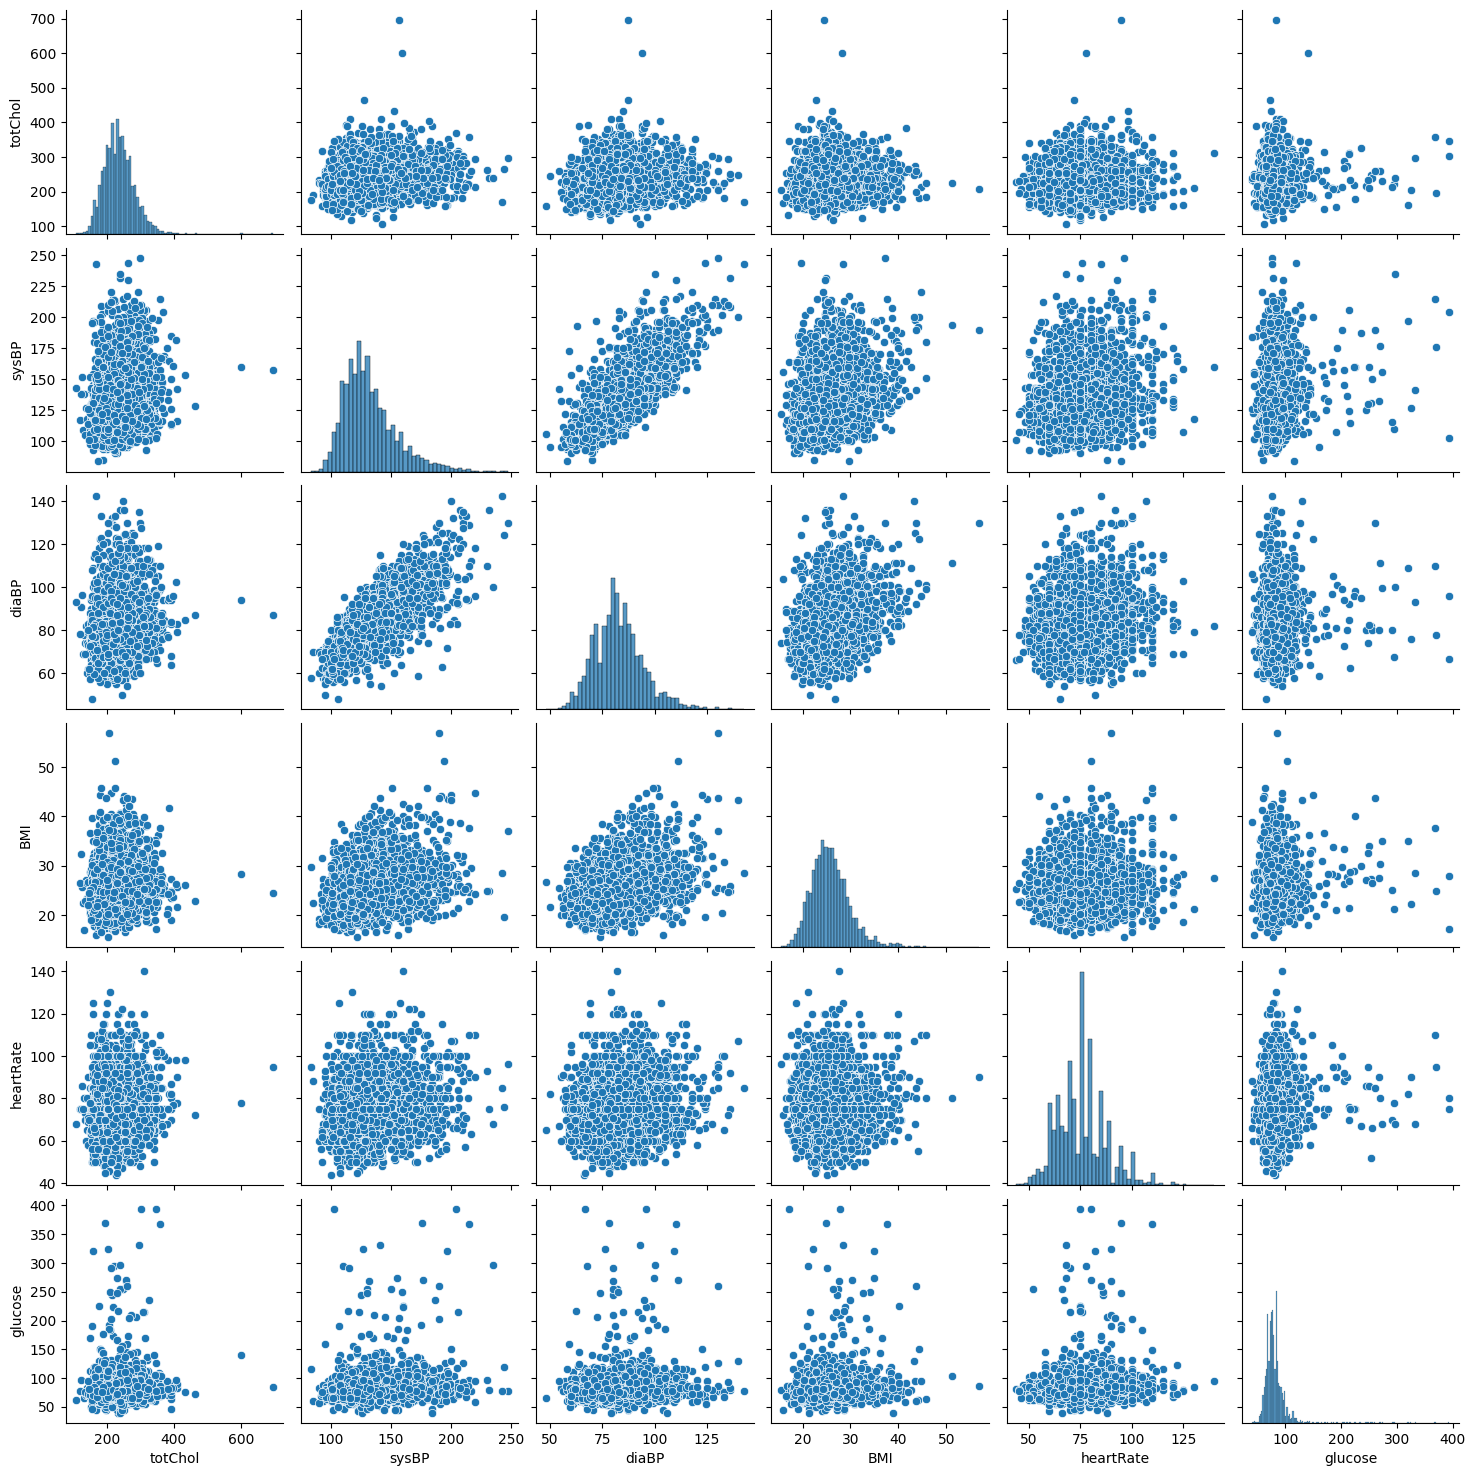

In [22]:
# To understand correlation between some features, pairplot is used
plt.figure(figsize=(20,15))
sns.pairplot(train_data.loc[:,'totChol': 'glucose'])

<Axes: >

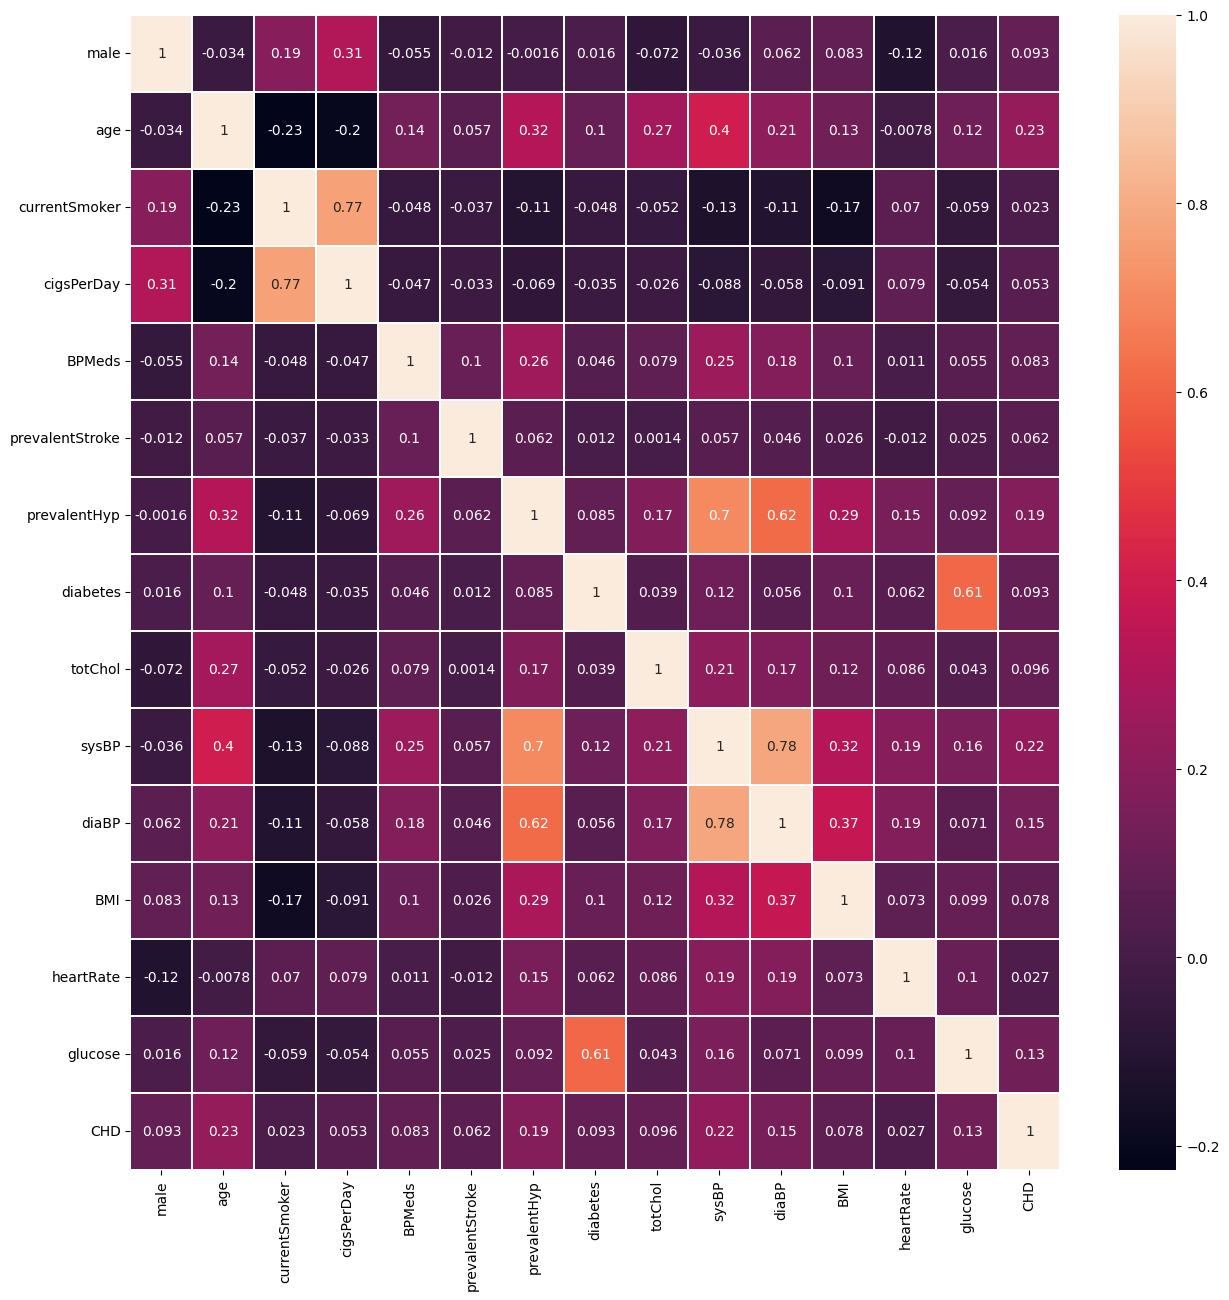

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(), annot=True, linewidths=0.1)

From pairplot and heatmap we see that sysBP and diaBP are highly correlated

And currentSmoker and cigsPerDay are highly correlated

In [24]:
# dropping features which are highly correlated
features_to_drop = ['currentSmoker', 'diaBP']

train_data.drop(features_to_drop, axis=1, inplace=True)

In [25]:
train_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
1073,1,48,0.0,0.0,0,0,0,181.0,153.0,29.34,103.0,88.0,0
953,0,39,5.0,0.0,0,0,0,170.0,137.5,27.35,67.0,70.0,0
2584,0,43,1.0,0.0,0,0,0,256.0,129.0,25.89,96.0,72.0,0
3068,0,46,30.0,0.0,0,0,0,196.0,114.0,21.01,60.0,69.0,0
1826,0,38,0.0,0.0,0,0,0,167.0,102.5,22.58,60.0,57.0,0


#Missing Values Checking

Missing values can be done before EDA or after EDA. But before EDA, it will impute or drop missing values for all features, whether some features are needed or not

And after EDA, we choose the features which are needed and those features only get imputed.

Also, the steps best for model preparation is : EDA -> Preprocessing (Missing values, Outliers, Normalise etc.) -> Model Fitting and Prediction

In [26]:
missing_values_count = train_data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
missing_values_percent = (missing_values_count * 100) / (train_data.shape[0])

print(max(missing_values_percent))

9.133296763576523


Maximum missing percentage is 9% approx so imputation will be done



In [27]:
print(missing_values_count)

cigsPerDay     25
BPMeds         46
totChol        42
BMI            18
heartRate       1
glucose       333
dtype: int64


In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [29]:
new_train_data = pd.DataFrame(imputer.fit_transform(train_data))
new_train_data.columns = train_data.columns
new_train_data.index = train_data.index

In [30]:
train_data.isnull().sum()

male                 0
age                  0
cigsPerDay          25
BPMeds              46
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             42
sysBP                0
BMI                 18
heartRate            1
glucose            333
CHD                  0
dtype: int64

In [31]:
new_train_data.isnull().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
CHD                0
dtype: int64

In [32]:
new_train_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
1073,1.0,48.0,0.0,0.0,0.0,0.0,0.0,181.0,153.0,29.34,103.0,88.0,0.0
953,0.0,39.0,5.0,0.0,0.0,0.0,0.0,170.0,137.5,27.35,67.0,70.0,0.0
2584,0.0,43.0,1.0,0.0,0.0,0.0,0.0,256.0,129.0,25.89,96.0,72.0,0.0
3068,0.0,46.0,30.0,0.0,0.0,0.0,0.0,196.0,114.0,21.01,60.0,69.0,0.0
1826,0.0,38.0,0.0,0.0,0.0,0.0,0.0,167.0,102.5,22.58,60.0,57.0,0.0


In [33]:
train_data = new_train_data.copy()

#Outliers Checking

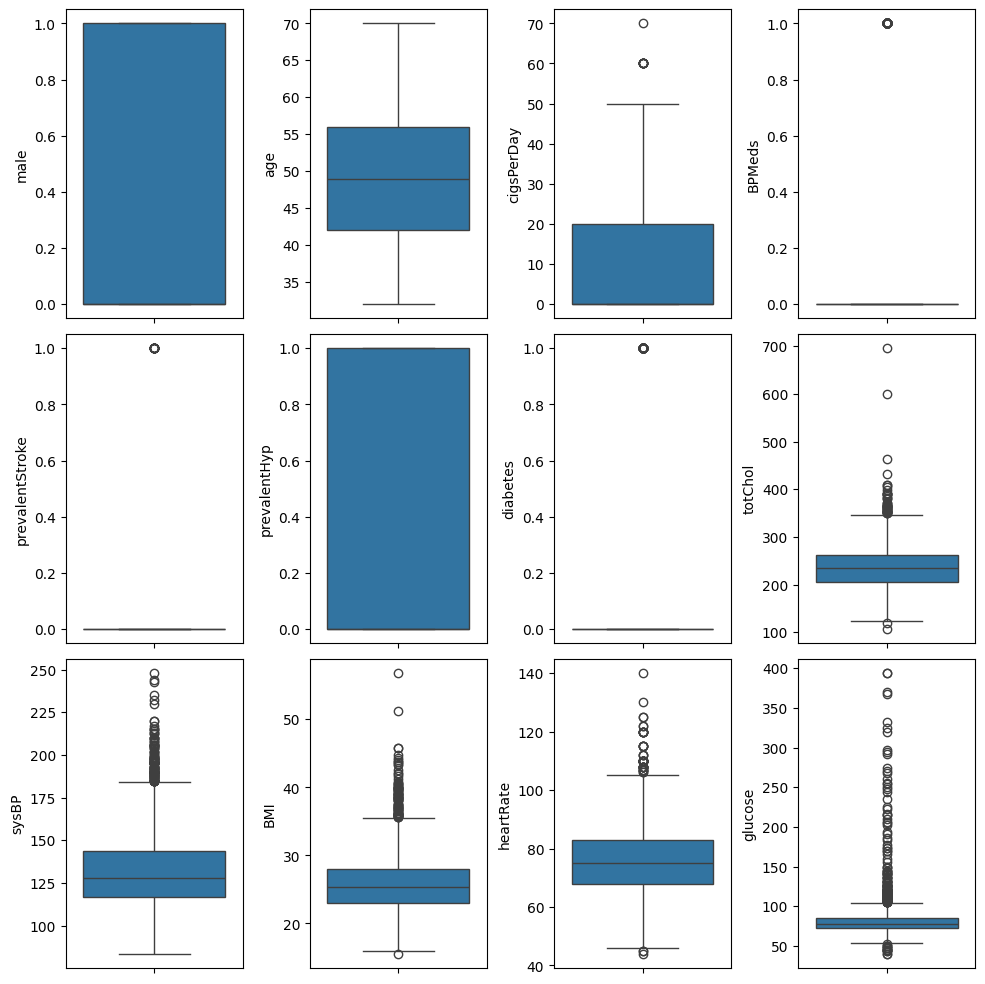

In [34]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in train_data.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

Conclusion of Boxplot :

Outliers found in features named ['totChol', 'sysBP', 'BMI','heartRate', 'glucose']

In [35]:
# Outliers handling
print('Number of training examples to be deleted for outliers removal is ',len(train_data[train_data['sysBP'] > 220]) + len(train_data[train_data['BMI'] > 43]) + len(
    train_data[train_data['heartRate'] > 125]) + len(train_data[train_data['glucose'] > 200]) + len(
    train_data[train_data['totChol'] > 450]))

Number of training examples to be deleted for outliers removal is  51


In [36]:
# deleting outliers

train_data = train_data[~(train_data['sysBP'] > 220)]
train_data = train_data[~(train_data['BMI'] > 43)]
train_data = train_data[~(train_data['heartRate'] > 125)]
train_data = train_data[~(train_data['glucose'] > 200)]
train_data = train_data[~(train_data['totChol'] > 450)]
print(train_data.shape)

(3597, 13)


#Normalization Checking

<ipython-input-37-d19473cac6c7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=ax[i])
<ipython-input-37-d19473cac6c7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=ax[i])
<ipython-input-37-d19473cac6c7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in

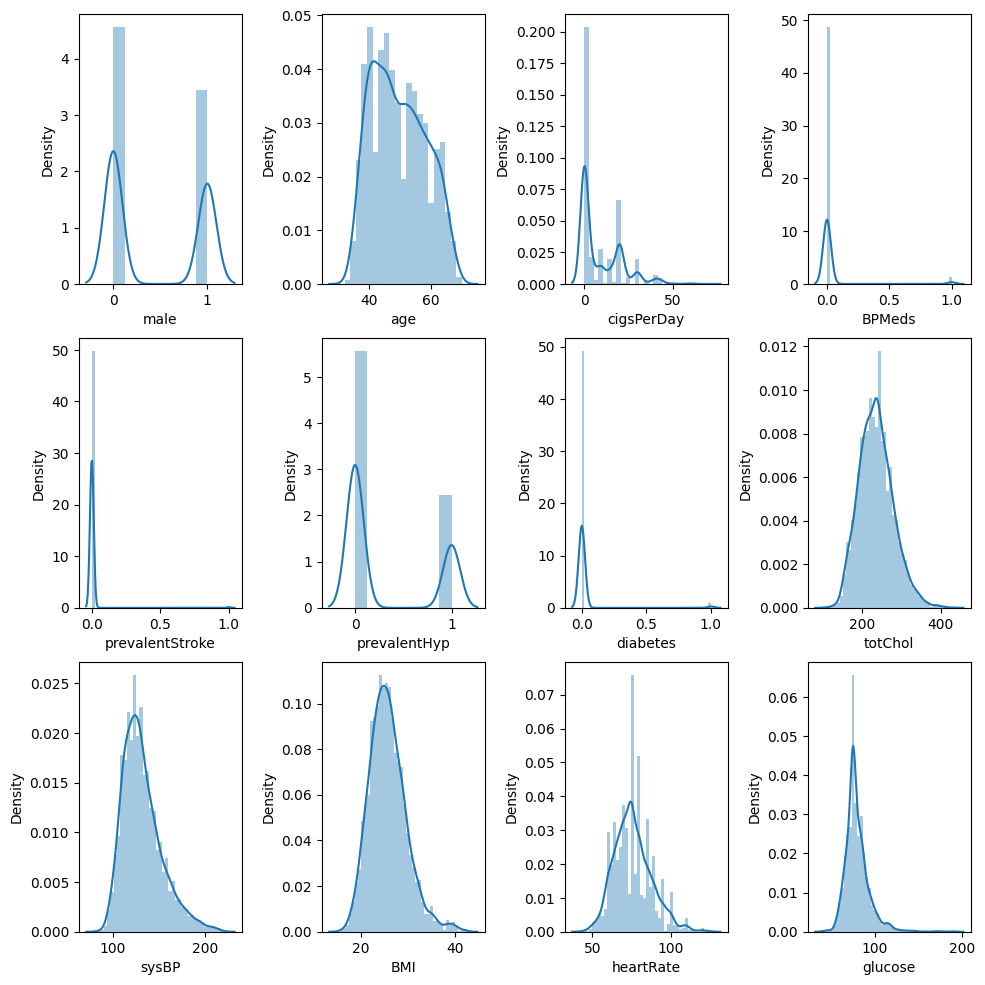

In [37]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in train_data.items():
    sns.distplot(v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

In [38]:
# Standardise some features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_standardise = ['age','totChol','sysBP','BMI', 'heartRate', 'glucose', 'cigsPerDay']
train_data[cols_to_standardise] = scaler.fit_transform(train_data[cols_to_standardise])

In [39]:
train_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
1073,1.0,-0.175233,-0.756838,0.0,0.0,0.0,0.0,-1.285939,0.988513,0.911735,2.283404,0.593220,0.0
953,0.0,-1.224008,-0.333785,0.0,0.0,0.0,0.0,-1.541289,0.262151,0.407063,-0.735829,-0.693199,0.0
2584,0.0,-0.757886,-0.672228,0.0,0.0,0.0,0.0,0.455083,-0.136176,0.036802,1.696331,-0.550264,0.0
3068,0.0,-0.408294,1.781481,0.0,0.0,0.0,0.0,-0.937735,-0.839107,-1.200784,-1.322902,-0.764667,0.0
1826,0.0,-1.340538,-0.756838,0.0,0.0,0.0,0.0,-1.610930,-1.378020,-0.802627,-1.322902,-1.622279,0.0


#Model Fitting

##Test Data Preprocessing Similar to Train Data


In [40]:
# dropping unwanted features as done in train data
test_data.drop(features_to_drop, axis=1, inplace=True)

# imputing missing values if any
imputer = SimpleImputer(strategy='most_frequent')
new_test_data = pd.DataFrame(imputer.fit_transform(test_data))
new_test_data.columns = test_data.columns
new_test_data.index = test_data.index

test_data = new_test_data.copy()

In [41]:
# Standardising features
scaler = StandardScaler()
test_data[cols_to_standardise] = scaler.fit_transform(test_data[cols_to_standardise])

In [42]:
test_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
1465,0.0,-0.312638,0.862555,0.0,0.0,1.0,0.0,1.996422,1.308089,1.714420,1.612541,0.221368,0.0
302,0.0,0.631835,-0.736813,0.0,0.0,0.0,0.0,-0.377000,-0.674245,0.174296,1.192506,-0.266243,0.0
87,0.0,1.340189,-0.656845,0.0,0.0,1.0,0.0,2.019026,3.173816,3.390976,-1.579730,-0.144341,0.0
843,0.0,-0.430697,-0.736813,0.0,0.0,0.0,0.0,-0.263980,-0.744210,0.964036,-1.327709,-0.469415,0.0
1431,1.0,-1.257111,-0.736813,0.0,0.0,0.0,0.0,-0.535228,-0.091205,-0.843707,0.352434,-0.144341,0.0


#Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [44]:
X_train = train_data.loc[:,train_data.columns != 'CHD']
y_train = train_data.loc[:,'CHD']
X_test = test_data.loc[:, test_data.columns !='CHD']
y_test = test_data.loc[:, 'CHD']

In [45]:
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
log_reg_accuracy = accuracy_score(y_pred_log, y_test) * 100
print('Accuracy Score for logistic regression is %f'%log_reg_accuracy)

Accuracy Score for logistic regression is 85.353535


In [48]:
log_train_score = log_reg.score(X_train, y_train) * 100
print('Train score for Logistic Regression is %f'%log_train_score)

Train score for Logistic Regression is 85.682513


In [49]:
print('Difference between train and test score for Logistic Regression is %f'%(log_train_score - log_reg_accuracy))

Difference between train and test score for Logistic Regression is 0.328978


In [50]:
confusion_matrix(y_pred_log, y_test)

array([[500,  87],
       [  0,   7]])

In [51]:
print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92       587
         1.0       0.07      1.00      0.14         7

    accuracy                           0.85       594
   macro avg       0.54      0.93      0.53       594
weighted avg       0.99      0.85      0.91       594



#Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier


In [53]:
dt_clf = DecisionTreeClassifier(min_samples_split=40, random_state=0)
# that fraction of samples(if float) or that many number(if int) of samples is atleast present in the node
# before splitting, then only split that node

# for min_samples_split as 180 I got a better accuracy and train score and difference was less
# but f1 score was very bad for positive class
# and setting min_samples_split as 40, we got good results for all metrics

In [54]:
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [55]:
dt_accuracy = accuracy_score(y_pred_dt, y_test)*100
print('Accuracy score for Decision tree is %f'%dt_accuracy)

Accuracy score for Decision tree is 82.828283


In [56]:
dt_train_score = dt_clf.score(X_train, y_train)*100
print('Train score for Decision tree is %f'%dt_train_score)

Train score for Decision tree is 87.711982


In [57]:
print('Difference between train and test scores for Decision tree is : %f'%(dt_train_score - dt_accuracy))

Difference between train and test scores for Decision tree is : 4.883699


In [58]:
confusion_matrix(y_pred_dt, y_test)

array([[478,  80],
       [ 22,  14]])

In [59]:
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.90       558
         1.0       0.15      0.39      0.22        36

    accuracy                           0.83       594
   macro avg       0.55      0.62      0.56       594
weighted avg       0.91      0.83      0.86       594



In [60]:
# Exporting the tree in text format
from sklearn.tree import export_text
dt_text_format = export_text(dt_clf, feature_names=list(train_data.columns[:12]))
print('Decision tree in text format : \n%s'%dt_text_format)

Decision tree in text format : 
|--- age <= -0.12
|   |--- sysBP <= 2.82
|   |   |--- cigsPerDay <= 0.05
|   |   |   |--- sysBP <= -0.22
|   |   |   |   |--- heartRate <= -1.11
|   |   |   |   |   |--- heartRate <= -1.20
|   |   |   |   |   |   |--- totChol <= -0.69
|   |   |   |   |   |   |   |--- totChol <= -0.79
|   |   |   |   |   |   |   |   |--- BMI <= -1.03
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- BMI >  -1.03
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- totChol >  -0.79
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- totChol >  -0.69
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- heartRate >  -1.20
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- heartRate >  -1.11
|   |   |   |   |   |--- glucose <= -0.87
|   |   |   |   |   |   |--- age <= -0.70
|   |   |   |   |   |   |   |--- totChol <= -1.52
|   |   |   |   |   |   |   |   |

#Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_clf = RandomForestClassifier(n_estimators = 150,min_samples_split=10,random_state=0)

In [63]:
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [64]:
rf_accuracy = accuracy_score(y_pred_rf, y_test)*100
print('Accuracy score for Random Forest is %f'%rf_accuracy)

Accuracy score for Random Forest is 84.511785


In [65]:
rf_train_score = rf_clf.score(X_train, y_train)*100
print('Train score for Random Forest is %f'%rf_train_score)

Train score for Random Forest is 91.687517


In [66]:
print('Difference between train and test scores for Random Forest is : %f'%(rf_train_score - rf_accuracy))

Difference between train and test scores for Random Forest is : 7.175733


In [67]:
confusion_matrix(y_pred_rf, y_test)

array([[497,  89],
       [  3,   5]])

In [68]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92       586
         1.0       0.05      0.62      0.10         8

    accuracy                           0.85       594
   macro avg       0.52      0.74      0.51       594
weighted avg       0.98      0.85      0.90       594



#Conclusion

Logistic Regression model has least difference in train and test scores and has accuracy of 85% approx So, it does not overfit the data. The F1-score is not good for positive class

So, Decision Tree Classifier was taken and we saw for min_samples_split as 40, we got almost good accuracy as logistic regression but better f1-score than logistic regression.

We also tried Random Forest Classifier with n_estimators as 150 and min_samples_split as 10. We got f1-score as the worst in all three models.

The hyperparameters were tested and tuned repeatedly to get better accuracy with better f1-score.

Thus, Decision Tree model is recommended for our dataset.

In [69]:
# prompt: Decision Tree Classifier with hyper-parameters (min_samples_split = 40)

dt_clf = DecisionTreeClassifier(min_samples_split=40, random_state=0)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_pred_dt, y_test)*100
print('Accuracy score for Decision tree is %f'%dt_accuracy)
dt_train_score = dt_clf.score(X_train, y_train)*100
print('Train score for Decision tree is %f'%dt_train_score)
print('Difference between train and test scores for Decision tree is : %f'%(dt_train_score - dt_accuracy))
confusion_matrix(y_pred_dt, y_test)
print(classification_report(y_pred_dt, y_test))


Accuracy score for Decision tree is 82.828283
Train score for Decision tree is 87.711982
Difference between train and test scores for Decision tree is : 4.883699
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.90       558
         1.0       0.15      0.39      0.22        36

    accuracy                           0.83       594
   macro avg       0.55      0.62      0.56       594
weighted avg       0.91      0.83      0.86       594

